<a href="https://colab.research.google.com/github/shirshmohan/Kidney-Stone-Classfication-Project/blob/main/Dino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [3]:
base_path = '/content/drive/MyDrive/Minor Project/MinorProject/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
categories = ["Cyst", "Normal", "Stone", "Tumor"]

In [6]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [7]:
df.head()

image_path label
0  /content/drive/MyDrive/Minor Project/MinorProj...  Cyst
1  /content/drive/MyDrive/Minor Project/MinorProj...  Cyst
2  /content/drive/MyDrive/Minor Project/MinorProj...  Cyst
3  /content/drive/MyDrive/Minor Project/MinorProj...  Cyst
4  /content/drive/MyDrive/Minor Project/MinorProj...  Cyst

In [8]:
df.tail()

image_path  label
12441  /content/drive/MyDrive/Minor Project/MinorProj...  Tumor
12442  /content/drive/MyDrive/Minor Project/MinorProj...  Tumor
12443  /content/drive/MyDrive/Minor Project/MinorProj...  Tumor
12444  /content/drive/MyDrive/Minor Project/MinorProj...  Tumor
12445  /content/drive/MyDrive/Minor Project/MinorProj...  Tumor

In [9]:
df.shape

(12446, 2)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_label_distribution(df, label_column="label", figsize=(10, 6), palette="viridis"):
    """
    Visualizes the distribution of labels in a DataFrame using count and pie charts.

    Args:
        df (pd.DataFrame): The DataFrame containing the label data.
        label_column (str): The name of the column containing the labels. Defaults to "label".
        figsize (tuple): The figure size for the plots. Defaults to (10, 6).
        palette (str): The color palette to use. Defaults to "viridis".
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=label_column, palette=palette)
    plt.title(f"Distribution of {label_column.capitalize()} - Count Plot")
    plt.xlabel(label_column.capitalize())
    plt.ylabel("Count")

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout() # Prevents labels from being cut off
    plt.show()

    label_counts = df[label_column].value_counts()
    plt.figure(figsize=figsize)
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
    plt.title(f"Distribution of {label_column.capitalize()} - Pie Chart")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3908905076.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=label_column, palette=palette)


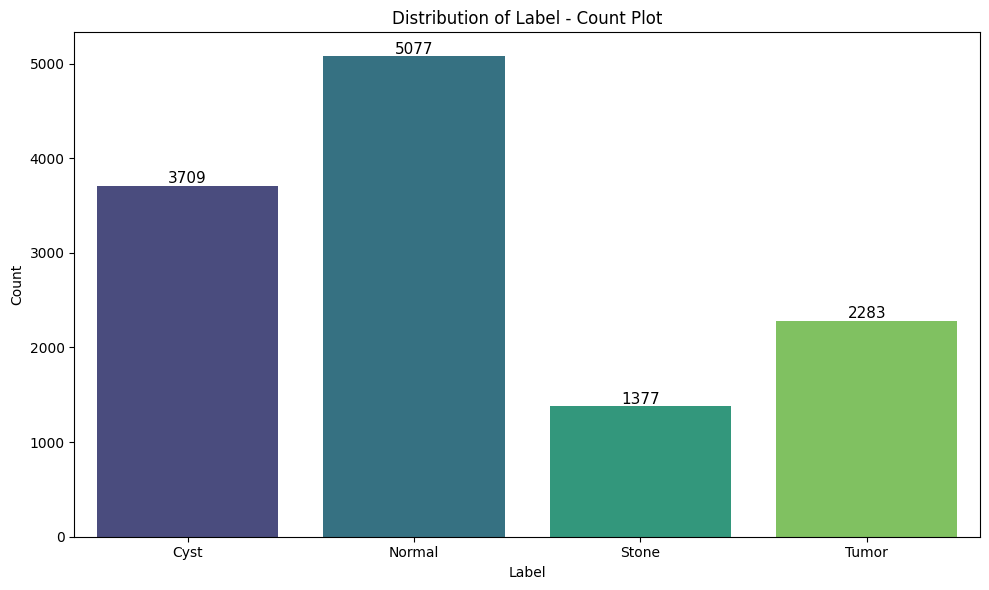

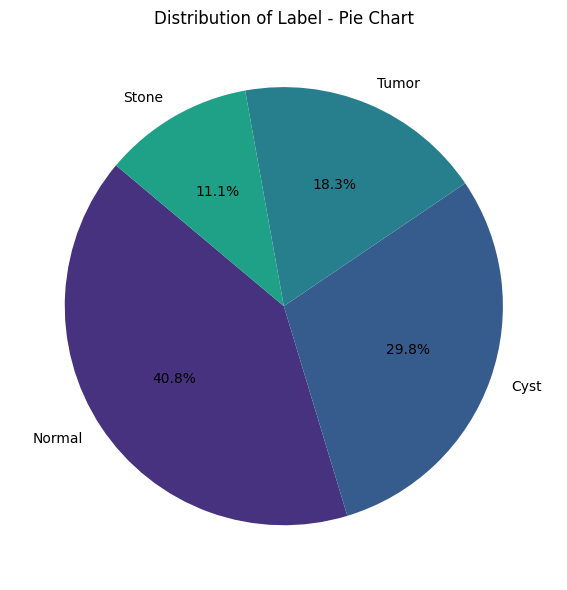

In [13]:
visualize_label_distribution(df)

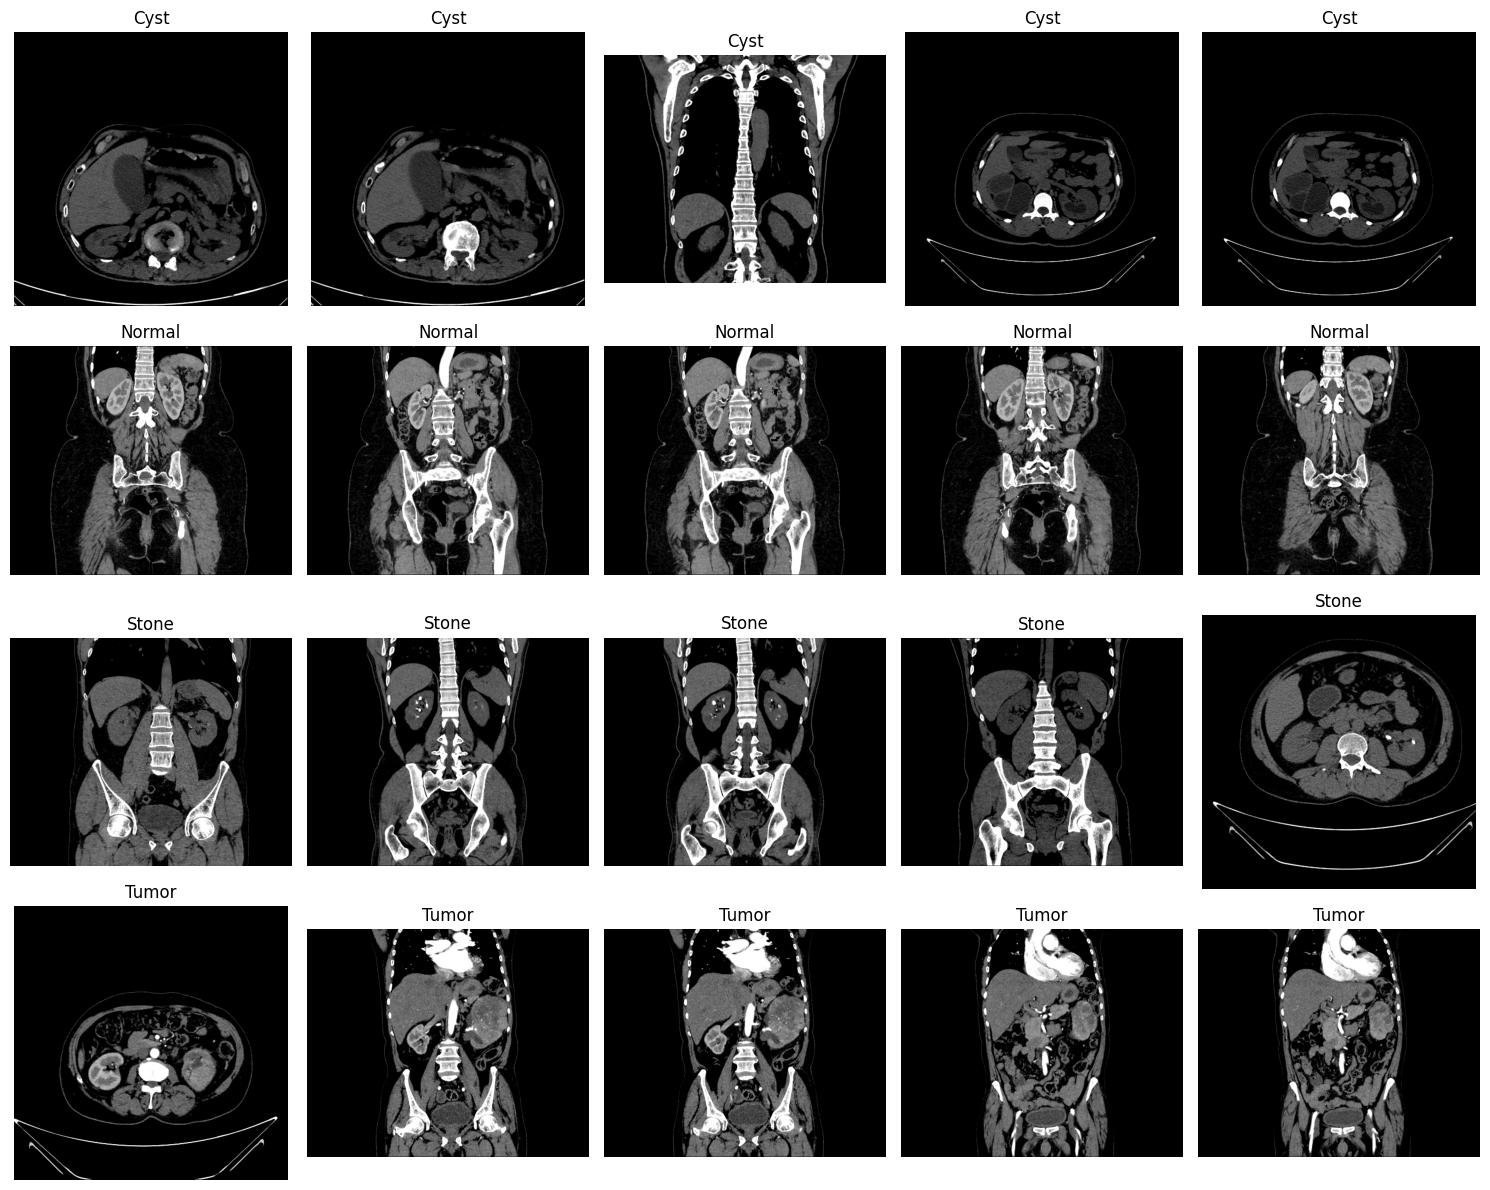

In [14]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [16]:
df = df[['image_path', 'category_encoded']]

In [18]:
from imblearn.over_sampling import RandomOverSampler

train_df, temp_df = train_test_split(
    df,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df['category_encoded']
)


valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df['category_encoded']
)

ros = RandomOverSampler(random_state=42)


X_train_resampled, y_train_resampled = ros.fit_resample(
    train_df[['image_path']],
    train_df['category_encoded']
)


train_df_balanced = pd.DataFrame(X_train_resampled, columns=['image_path'])
train_df_balanced['category_encoded'] = y_train_resampled

print("Balanced Training Set Counts:\n", train_df_balanced['category_encoded'].value_counts())
print("\nOriginal (Imbalanced) Test Set Counts:\n", test_df['category_encoded'].value_counts())

Balanced Training Set Counts:
 category_encoded
1    4061
0    4061
2    4061
3    4061
Name: count, dtype: int64

Original (Imbalanced) Test Set Counts:
 category_encoded
1    508
0    371
3    228
2    138
Name: count, dtype: int64


In [19]:
print("\nClass distribution before oversampling:")
print(df['category_encoded'].value_counts())


Class distribution before oversampling:
category_encoded
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64


In [20]:
train_df_balanced['category_encoded'] = train_df_balanced['category_encoded'].astype(str)
test_df['category_encoded'] = test_df['category_encoded'].astype(str)


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
print("TensorFlow version:", tf.__version__)
print("Success! Layer imported.")

TensorFlow version: 2.19.0
Success! Layer imported.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [22]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_balanced,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 16244 validated image filenames belonging to 4 classes.


In [23]:
# Convert the encoded labels to strings
train_df_balanced['category_encoded'] = train_df_balanced['category_encoded'].astype(str)
valid_df['category_encoded'] = valid_df['category_encoded'].astype(str)
test_df['category_encoded'] = test_df['category_encoded'].astype(str)

In [24]:
valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 1245 validated image filenames belonging to 4 classes.
Found 1245 validated image filenames belonging to 4 classes.


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
!pip install transformers

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim

        self.proj = layers.Conv2D(embed_dim, kernel_size=patch_size, strides=patch_size, padding='valid')

    def call(self, images):
        patches = self.proj(images)

        batch_size = tf.shape(patches)[0]
        num_patches = tf.shape(patches)[1] * tf.shape(patches)[2]
        patches = tf.reshape(patches, (batch_size, num_patches, self.embed_dim))
        return patches

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate, name=None):
        super(TransformerBlock, self).__init__(name=name)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation=tf.nn.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])

    def call(self, x, training=False):

        x1 = self.layernorm1(x)
        x = x + self.attn(x1, x1, training=training)
        x2 = self.layernorm2(x)
        x = x + self.mlp(x2, training=training)
        return x

class DINOViT(tf.keras.Model):
    def __init__(self, image_size=(224, 224), patch_size=16, embed_dim=384,
                 num_heads=6, num_blocks=12, mlp_dim=1536, num_classes=4, dropout_rate=0.1):
        super(DINOViT, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)


        self.cls_token = self.add_weight(name="cls_token", shape=(1, 1, embed_dim), initializer="zeros")
        self.pos_embed = self.add_weight(name="pos_embed", shape=(1, num_patches + 1, embed_dim), initializer="zeros")

        self.dropout = layers.Dropout(dropout_rate)


        self.transformer_blocks = []
        for i in range(num_blocks):

            name = "grad_target_block" if i == num_blocks - 1 else f"block_{i}"
            self.transformer_blocks.append(TransformerBlock(embed_dim, num_heads, mlp_dim, dropout_rate, name=name))

        self.norm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax')

    def call(self, x, training=False):
        batch_size = tf.shape(x)[0]


        x = self.patch_embed(x)

        cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)
        x = tf.concat([cls_tokens, x], axis=1)


        x = x + self.pos_embed
        x = self.dropout(x, training=training)


        for block in self.transformer_blocks:
            x = block(x, training=training)

        x = self.norm(x)
        return self.classifier(x[:, 0])

dino_model = DINOViT(
    image_size=(224, 224),
    patch_size=16,
    embed_dim=384,
    num_heads=6,
    num_blocks=12,
    mlp_dim=1536,
    num_classes=4
)

dino_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dino_model.build(input_shape=(None, 224, 224, 3))
dino_model.summary()

Model: "dino_vi_t"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_embedding                 │ ?                      │   0 (unbuilt) │
│ (PatchEmbedding)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_0 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_1 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_2 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_3 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_4 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_5 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_6 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_7 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_8 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_9 (TransformerBlock)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_10 (TransformerBlock)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ grad_target_block               │ ?                      │   0 (unbuilt) │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_24          │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,032 (297.00 KB)

 Trainable params: 76,032 (297.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 5
checkpoint = ModelCheckpoint(
    'best_dino_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = dino_model.fit(
    train_gen_new,
    epochs=epochs,
    validation_data=valid_gen_new,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4288 - loss: 1.2683
Epoch 1: val_loss improved from inf to 0.47034, saving model to best_dino_model.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 6596s 6s/step - accuracy: 0.4289 - loss: 1.2680 - val_accuracy: 0.8402 - val_loss: 0.4703
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.8905 - loss: 0.3000
Epoch 2: val_loss improved from 0.47034 to 0.13873, saving model to best_dino_model.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 227s 223ms/step - accuracy: 0.8906 - loss: 0.2999 - val_accuracy: 0.9462 - val_loss: 0.1387
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9342 - loss: 0.1712
Epoch 3: val_loss improved from 0.13873 to 0.11101, saving model to best_dino_model.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 218s 214ms/step - accuracy: 0.9342 - loss: 0.1712 - val_accuracy: 0.9566 - val_loss: 0.1110
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9559 - loss: 0.1187
Epoch 4: val_l

In [29]:

import shutil
shutil.copy('best_dino_model.keras', '/content/drive/MyDrive/Minor Project/')

'/content/drive/MyDrive/Minor Project/best_dino_model.keras'

In [45]:

input_layer = tf.keras.Input(shape=(224, 224, 3))

output_layer = dino_model(input_layer)


functional_dino = tf.keras.Model(inputs=input_layer, outputs=output_layer)

print("Functional model built successfully!")

Functional model built successfully!


In [46]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
def compute_dino_gradcam(model, img_array, class_index):

    inner_model = model.get_layer("dino_vi_t")


    with tf.GradientTape() as tape:

        x = inner_model.patch_embed(img_array)


        batch_size = tf.shape(x)[0]
        cls_tokens = tf.repeat(inner_model.cls_token, repeats=batch_size, axis=0)
        x = tf.concat([cls_tokens, x], axis=1)
        x = x + inner_model.pos_embed


        for i, block in enumerate(inner_model.transformer_blocks):
            x = block(x, training=False)
            if i == len(inner_model.transformer_blocks) - 1:
                target_block_output = x


        x_norm = inner_model.norm(target_block_output)
        preds = inner_model.classifier(x_norm[:, 0])
        loss = preds[:, class_index]


    grads = tape.gradient(loss, target_block_output)


    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    heatmap = target_block_output[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()

In [31]:
def display_dino_gradcam(img_path, heatmap, alpha=0.5):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))


    grid_size = 14
    heatmap_grid = heatmap[1:].reshape((grid_size, grid_size))

    heatmap_grid = cv2.resize(heatmap_grid, (224, 224))
    heatmap_grid = np.uint8(255 * heatmap_grid)
    heatmap_color = cv2.applyColorMap(heatmap_grid, cv2.COLORMAP_JET)


    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img, 1 - alpha, 0)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Kidney CT")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("DINOv2 Diagnostic Focus (Grad-CAM)")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

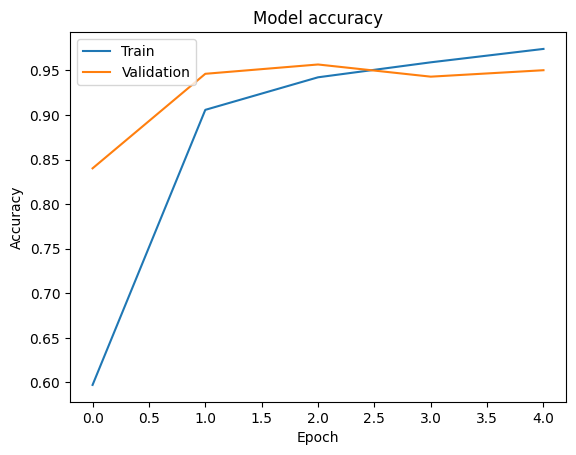

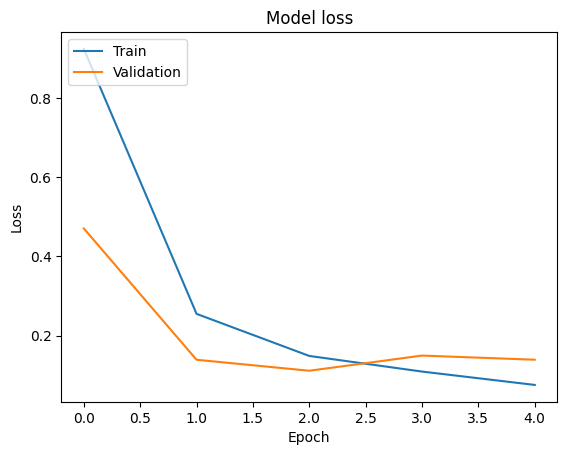

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
test_labels = test_gen_new.classes


predictions = dino_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys())))

78/78 ━━━━━━━━━━━━━━━━━━━━ 719s 9s/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       371
           1       0.97      0.96      0.97       508
           2       0.99      0.93      0.96       138
           3       0.85      0.98      0.91       228

    accuracy                           0.96      1245
   macro avg       0.95      0.95      0.95      1245
weighted avg       0.96      0.96      0.96      1245



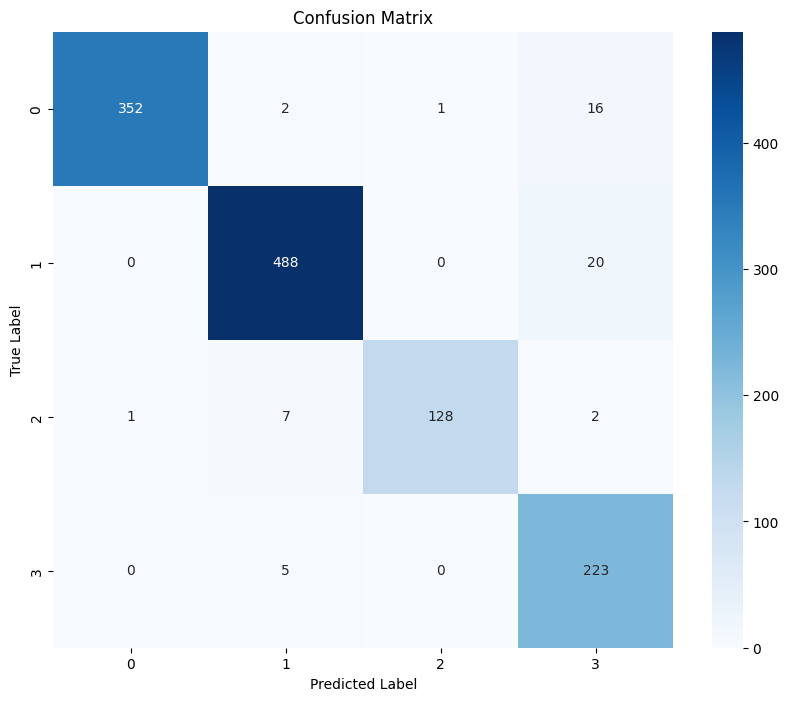

In [34]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

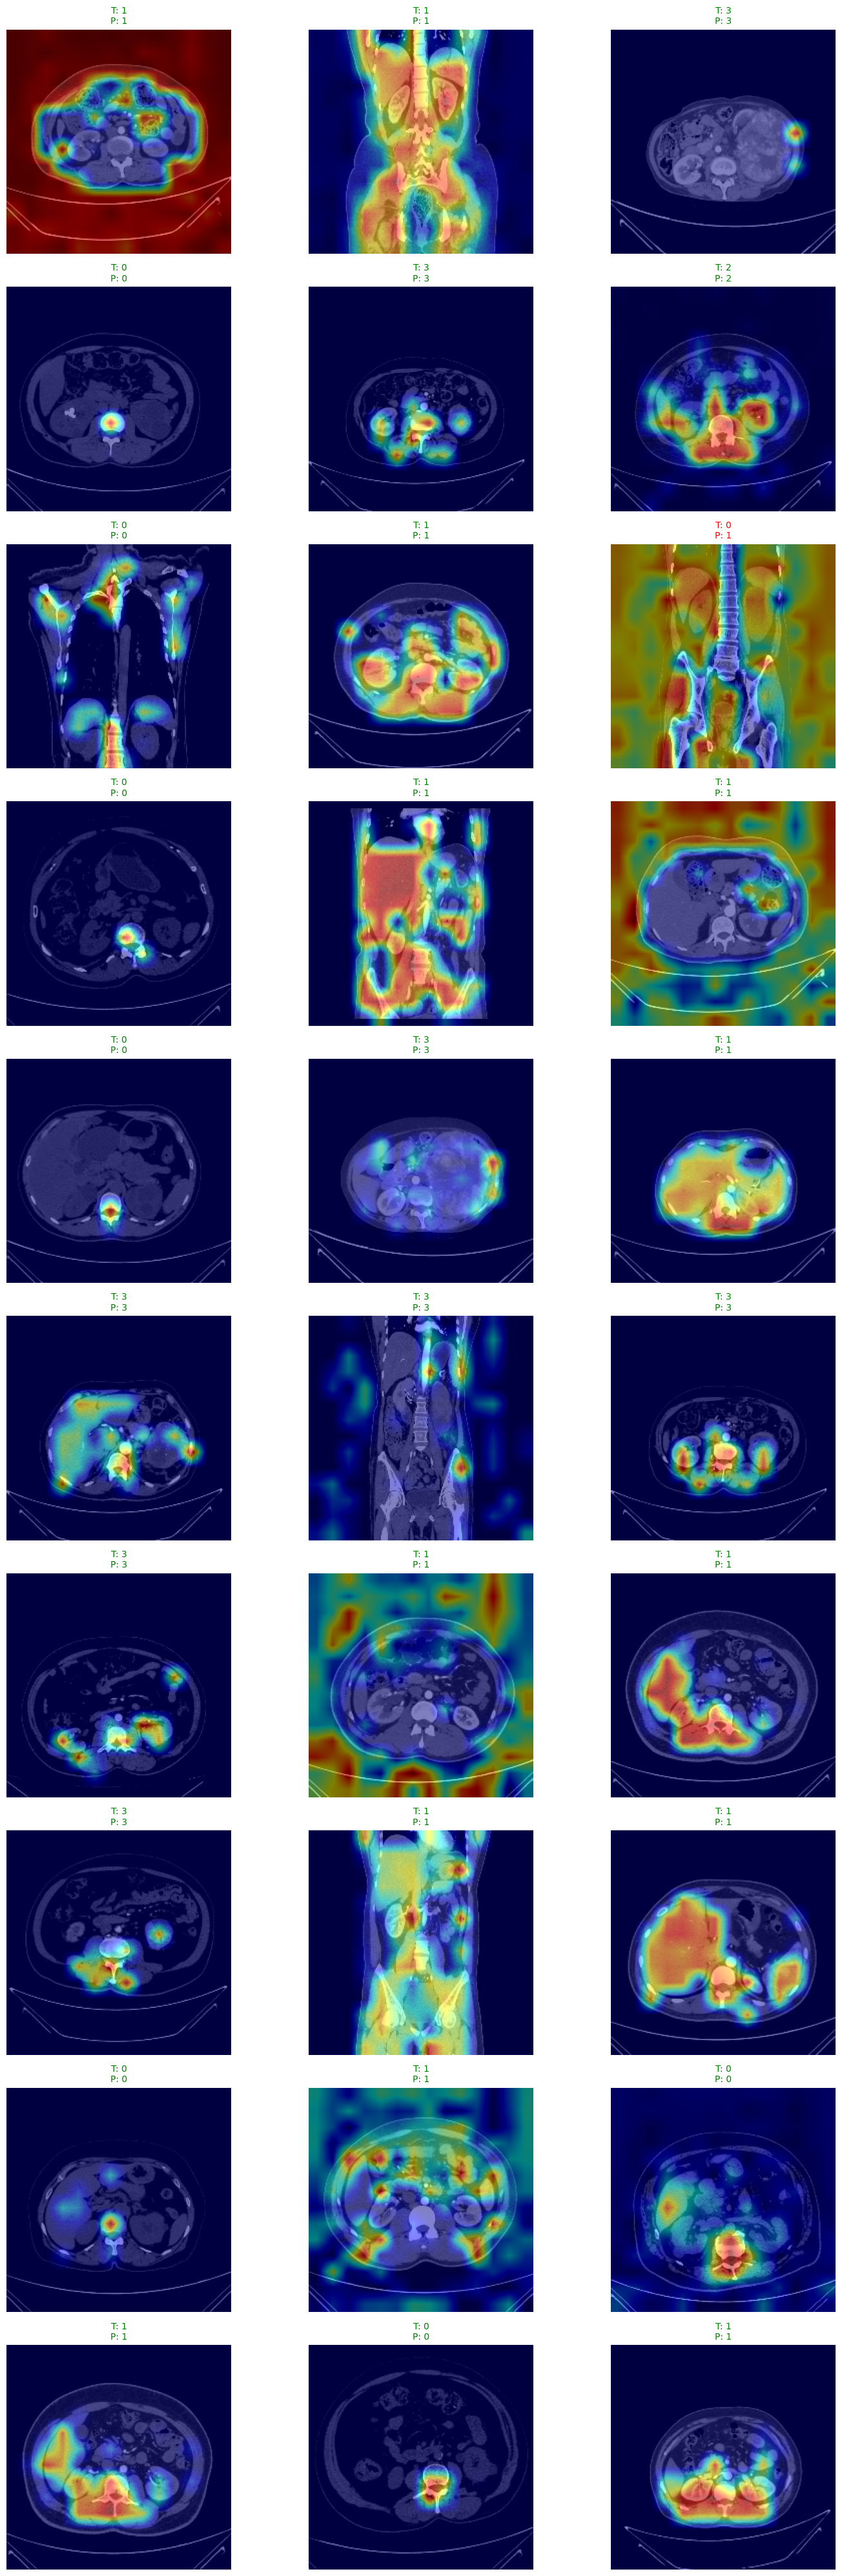

In [47]:
import matplotlib.pyplot as plt
import os

def plot_gradcam_grid(model, generator, rows=10, cols=3):
    max_images = rows * cols
    generator.reset()
    class_labels = {v: k for k, v in generator.class_indices.items()}

    plt.figure(figsize=(cols * 5, rows * 4)) # Adjust size for clarity

    count = 0
    batch_index = 0

    while count < max_images:
        imgs, labels = next(generator)
        batch_size = imgs.shape[0]
        filenames = generator.filenames[batch_index * generator.batch_size : (batch_index + 1) * generator.batch_size]

        for i in range(batch_size):
            if count >= max_images: break

            img_input = np.expand_dims(imgs[i], axis=0)
            preds = model.predict(img_input, verbose=0)
            pred_idx = np.argmax(preds[0])
            true_idx = int(labels[i]) if labels.ndim == 1 else np.argmax(labels[i])


            heatmap = compute_dino_gradcam(model, img_input, class_index=pred_idx)


            img_path = os.path.join(generator.directory, filenames[i])
            original_img = cv2.imread(img_path)
            original_img = cv2.resize(original_img, (224, 224))

            grid_size = 14
            heatmap_grid = heatmap[1:].reshape((grid_size, grid_size))
            heatmap_grid = cv2.resize(heatmap_grid, (224, 224))
            heatmap_grid = np.uint8(255 * heatmap_grid)
            heatmap_color = cv2.applyColorMap(heatmap_grid, cv2.COLORMAP_JET)
            superimposed = cv2.addWeighted(heatmap_color, 0.5, original_img, 0.5, 0)
            superimposed = cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB)


            plt.subplot(rows, cols, count + 1)
            plt.imshow(superimposed)


            title_color = 'green' if pred_idx == true_idx else 'red'
            plt.title(f"T: {class_labels[true_idx]}\nP: {class_labels[pred_idx]}",
                      color=title_color, fontsize=10)
            plt.axis('off')

            count += 1
        batch_index += 1

    plt.tight_layout()
    plt.savefig('kidney_dino_results_grid.png', dpi=300)
    plt.show()


test_gen_new.shuffle = False
test_gen_new.reset()

plot_gradcam_grid(functional_dino, test_gen_new, rows=10, cols=3)

In [55]:
import tensorflow as tf


dino_model = DINOViT(
    image_size=(224, 224),
    patch_size=16,
    embed_dim=384,
    num_heads=6,
    num_blocks=12,
    mlp_dim=1536,
    num_classes=4
)


dino_model.build(input_shape=(None, 224, 224, 3))


model_path = '/content/drive/MyDrive/Minor Project/best_dino_model_v2.keras'
dino_model.load_weights(model_path)

dino_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Weights loaded into a fresh architecture! Ready to train.")

✅ Weights loaded into a fresh architecture! Ready to train.


In [53]:


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_dino_model_v2.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


history_v2 = dino_model.fit(
    train_gen_new,
    epochs=5,
    validation_data=valid_gen_new,
    callbacks=[early_stopping, checkpoint]
)


import shutil
shutil.copy('best_dino_model_v2.keras', '/content/drive/MyDrive/Minor Project/')

Epoch 1/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.4705 - loss: 1.1714
Epoch 1: val_loss improved from inf to 0.34896, saving model to best_dino_model_v2.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 332s 262ms/step - accuracy: 0.4707 - loss: 1.1710 - val_accuracy: 0.8843 - val_loss: 0.3490
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9183 - loss: 0.2229
Epoch 2: val_loss improved from 0.34896 to 0.14670, saving model to best_dino_model_v2.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 256s 231ms/step - accuracy: 0.9183 - loss: 0.2229 - val_accuracy: 0.9398 - val_loss: 0.1467
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9494 - loss: 0.1397
Epoch 3: val_loss did not improve from 0.14670
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 221s 215ms/step - accuracy: 0.9494 - loss: 0.1397 - val_accuracy: 0.9205 - val_loss: 0.2423
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9547 - loss: 0.1202
Epoch 4: val_loss improved from 0.14670 to 0.0

'/content/drive/MyDrive/Minor Project/best_dino_model_v2.keras'

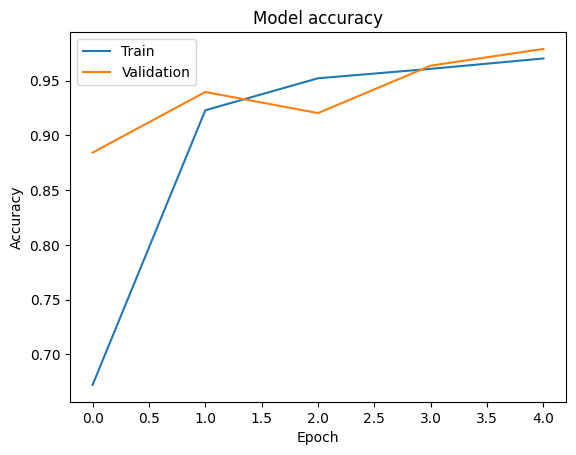

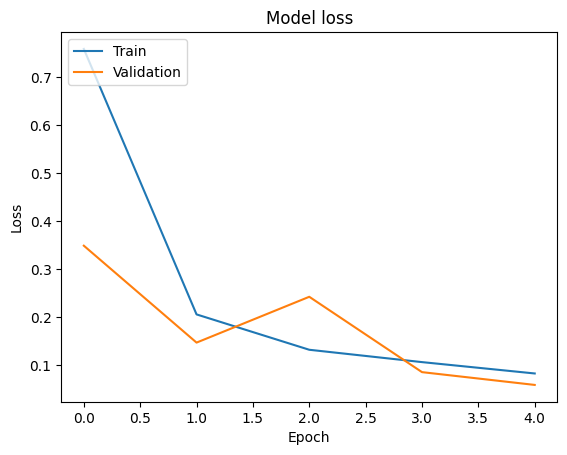

In [56]:
plt.plot(history_v2.history['accuracy'])
plt.plot(history_v2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_v2.history['loss'])
plt.plot(history_v2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
test_labels = test_gen_new.classes


model_path = '/content/drive/MyDrive/Minor Project/best_dino_model_v2.keras'
dino_model.load_weights(model_path)
predictions = dino_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys())))

78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       371
           1       1.00      0.95      0.98       508
           2       0.96      1.00      0.98       138
           3       0.92      1.00      0.96       228

    accuracy                           0.98      1245
   macro avg       0.97      0.99      0.98      1245
weighted avg       0.98      0.98      0.98      1245



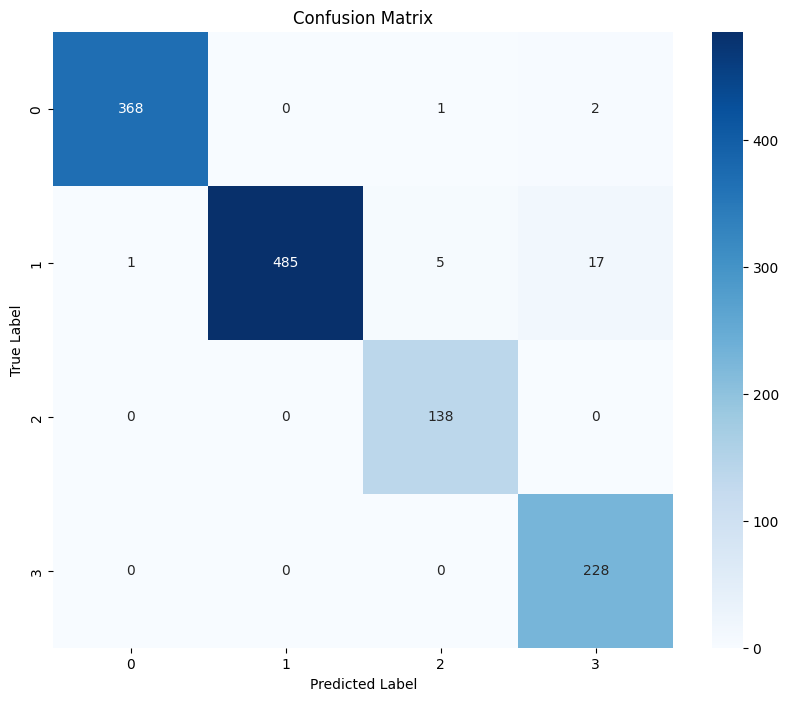

In [60]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [66]:

input_layer = tf.keras.Input(shape=(224, 224, 3))
output_layer = dino_model(input_layer)
functional_dino = tf.keras.Model(inputs=input_layer, outputs=output_layer)


original_get_layer = functional_dino.get_layer

def patched_get_layer(name=None, index=None):
    if name == "dino_vi_t":
        return original_get_layer("dino_vi_t_3")
    return original_get_layer(name, index)

functional_dino.get_layer = patched_get_layer

print("✅ Patch applied! The function will now find 'dino_vi_t_3' automatically.")

✅ Patch applied! The function will now find 'dino_vi_t_3' automatically.


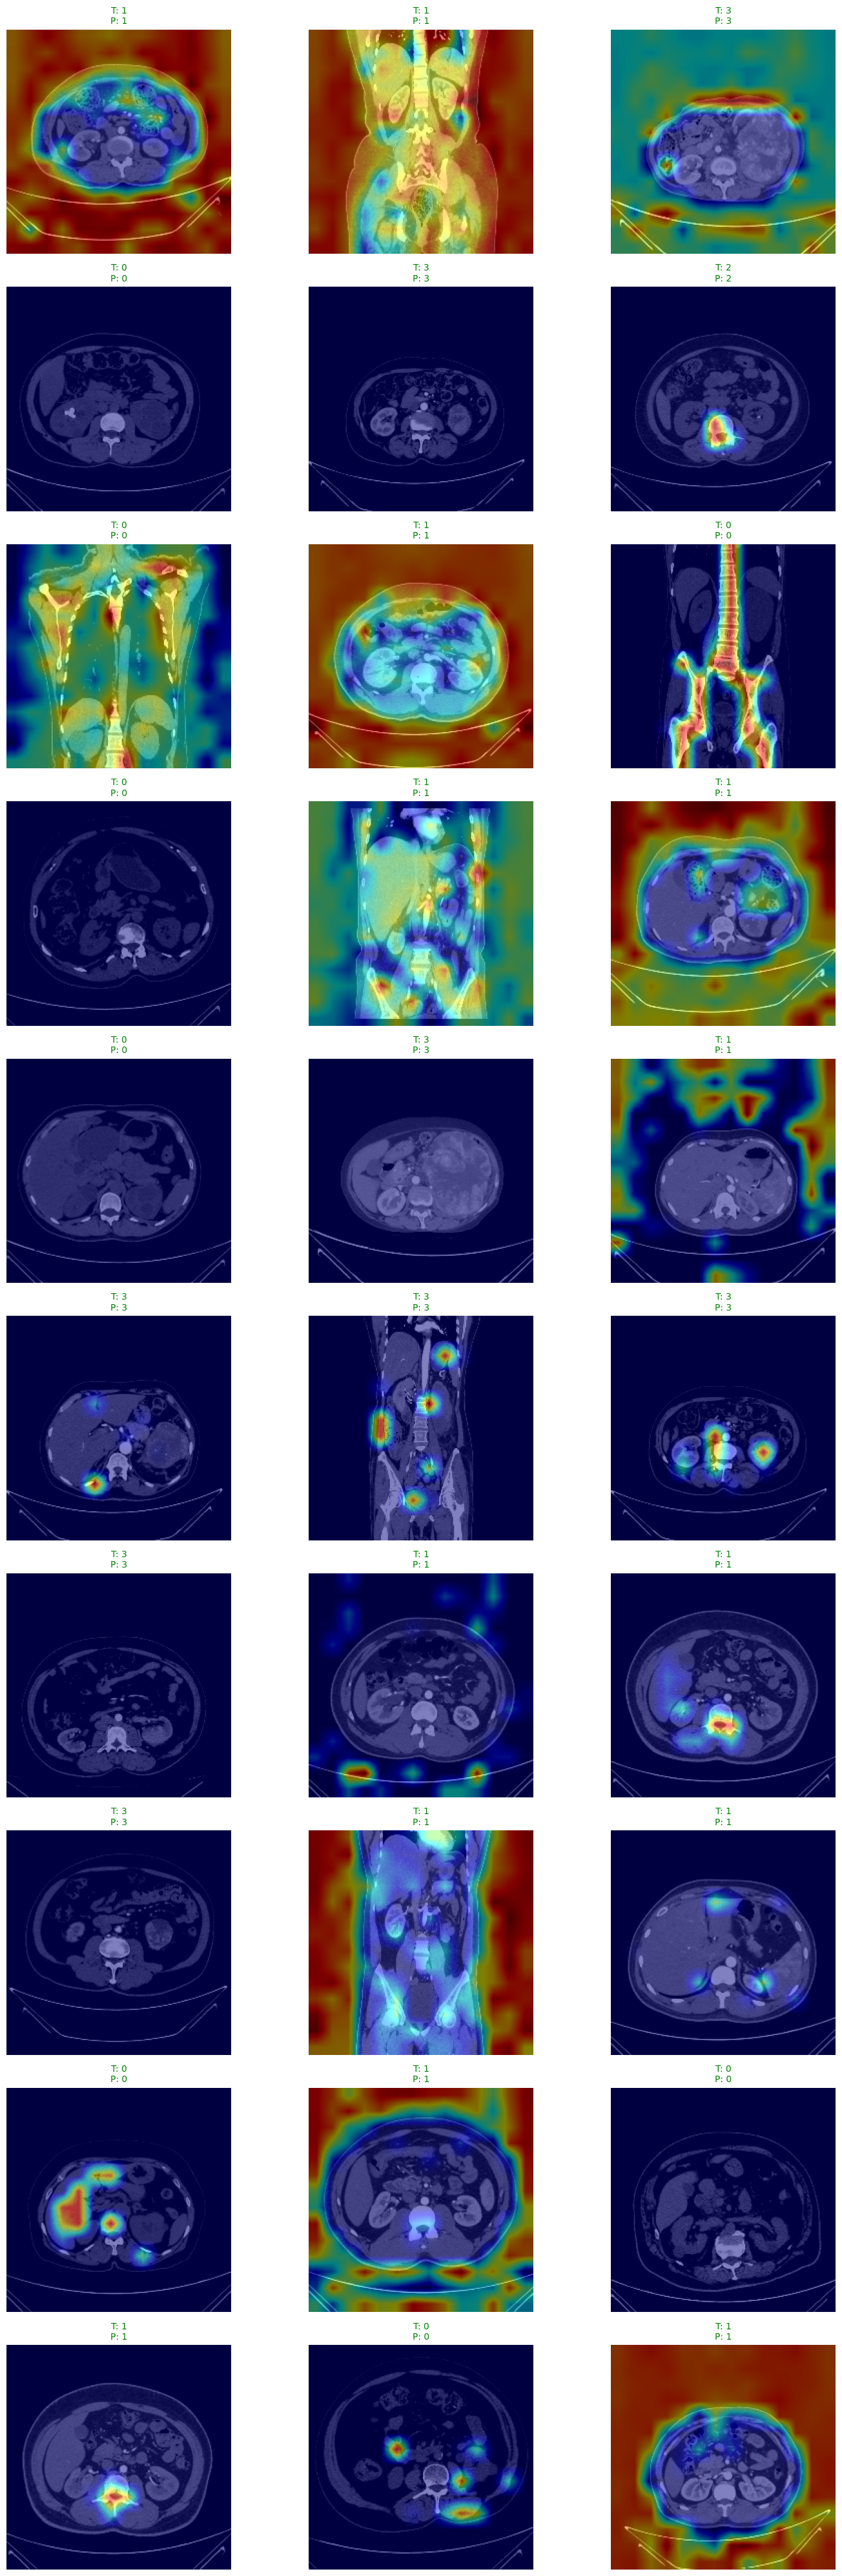

In [67]:


test_gen_new.shuffle = False
test_gen_new.reset()

# Run the grid
plot_gradcam_grid(functional_dino, test_gen_new, rows=10, cols=3)